In [1]:
import pandas as pd 
import numpy as np

import gc
import time
import warnings
import os

from datetime import datetime
from datetime import timedelta

from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls




In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse


## Load and explore data
Before we do anything, lets import some packages.

In [3]:
#os.chdir("C:\\Users\\Vaibhav\\Music\\Desktop\\Projects\\Walmart-forecasting\\6. WALMART STORE PREDICTION - FORECASTING\\data")
os.chdir('G:\\EIP Classes\\analytics\\AnalytixLabs-Bangalore_Moin\\WALMART STORE PREDICTION - FORECASTING')


In [4]:
train=pd.read_csv('trainMerged.csv')

In [5]:
test=pd.read_csv('testMerged.csv')

In [6]:
train["Split"]="Train"

In [7]:
test["Split"]="Test"

In [8]:
train.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Split
0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,Train
1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,Train
2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,Train
3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,Train
4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,Train


### Taking info of all Dataset:-

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Date            421570 non-null object
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Split           421570 non-null object
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 51.9+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 16 columns):
Store           115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Dept            115064 non-null int64
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
Split           115064 non-null object
dtypes: bool(1), float64(9), int64(3), object(3)
memory usage: 13.3+ MB


In [11]:
walmart_data=pd.concat([train,test],axis=0)

In [12]:
walmart_data.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
0,126.442065,2010-02-05,1,2.962,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,54.34,B,9.765,40212.84
1,126.442065,2010-02-05,98,2.962,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,54.34,B,9.765,74.00
2,126.442065,2010-02-05,32,2.962,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,54.34,B,9.765,26116.73
3,126.442065,2010-02-05,25,2.962,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,54.34,B,9.765,20779.50
4,126.442065,2010-02-05,34,2.962,False,NaN,NaN,NaN,NaN,NaN,126512,Train,10,54.34,B,9.765,50585.42


In [13]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 115063
Data columns (total 17 columns):
CPI             498472 non-null float64
Date            536634 non-null object
Dept            536634 non-null int64
Fuel_Price      536634 non-null float64
IsHoliday       536634 non-null bool
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
Size            536634 non-null int64
Split           536634 non-null object
Store           536634 non-null int64
Temperature     536634 non-null float64
Type            536634 non-null object
Unemployment    498472 non-null float64
Weekly_Sales    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 70.1+ MB


### Describing Walmart Sales Data:-

In [14]:
# Describing the Data:-

walmart_data.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,498472.000000,536634.000000,536634.000000,265596.000000,197685.000000,242326.000000,237143.000000,266496.000000,536634.00000,536634.000000,536634.000000,498472.000000,421570.000000
mean,172.090481,44.277301,3.408310,7438.004144,3509.274827,1857.913525,3371.556866,4324.021158,136678.55096,22.208621,58.771762,7.791888,15981.258123
std,39.542149,30.527358,0.430861,9411.341379,8992.047197,11616.143274,6872.281734,13549.262124,61007.71180,12.790580,18.678716,1.865076,22711.183519
min,126.064000,1.000000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,34875.00000,1.000000,-7.290000,3.684000,-4988.940000
25%,132.521867,18.000000,3.041000,2114.640000,72.500000,7.220000,336.240000,1570.112500,93638.00000,11.000000,45.250000,6.623000,2079.650000
50%,182.442420,37.000000,3.523000,5126.540000,385.310000,40.760000,1239.040000,2870.910000,140167.00000,22.000000,60.060000,7.795000,7612.030000
75%,213.748126,74.000000,3.744000,9303.850000,2392.390000,174.260000,3397.080000,5012.220000,202505.00000,33.000000,73.230000,8.549000,20205.852500
max,228.976456,99.000000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,219622.00000,45.000000,101.950000,14.313000,693099.360000


#### Performing pandas profiling for getting more information about data

In [15]:
import pandas_profiling as pf

C:\Users\Vaibhav\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Vaibhav\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Vaibhav\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Vaibhav\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File 

In [16]:
#pf.ProfileReport(walmart_data)

In [17]:
walmart_data["Temperature"]=(walmart_data['Temperature'] - 32) * 5/9

#### Checking Corr Between the Var:-

In [18]:
# Correlation matrix:-

corr=walmart_data.corr()

In [19]:
corr

,CPI,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
CPI,1.000000,-0.007262,-0.180445,0.001410,-0.041049,-0.043525,-0.020147,-0.051643,0.002009,-0.003341,-0.211333,0.169070,-0.301696,-0.020921
Dept,-0.007262,1.000000,0.003273,0.001002,-0.002414,0.000646,0.000856,0.003413,0.000559,-0.002004,0.023061,0.004151,0.007077,0.148032
Fuel_Price,-0.180445,0.003273,1.000000,-0.077976,0.065501,-0.200338,-0.059407,-0.010329,-0.023529,0.009058,0.073123,0.099235,-0.030976,-0.000120
IsHoliday,0.001410,0.001002,-0.077976,1.000000,0.155907,0.306810,0.455563,0.137478,-0.025361,0.000345,-0.000671,-0.163056,-0.002996,0.012774
MarkDown1,-0.041049,-0.002414,0.065501,0.155907,1.000000,0.014288,-0.096141,0.810074,0.078151,0.325043,-0.104831,-0.107973,0.025099,0.085251
MarkDown2,-0.043525,0.000646,-0.200338,0.306810,0.014288,1.000000,-0.055310,-0.048790,-0.010670,0.128038,-0.037433,-0.323246,-0.002587,0.024130
MarkDown3,-0.020147,0.000856,-0.059407,0.455563,-0.096141,-0.055310,1.000000,-0.064432,-0.017531,0.049204,-0.028302,-0.076256,-0.002328,0.060385
MarkDown4,-0.051643,0.003413,-0.010329,0.137478,0.810074,-0.048790,-0.064432,1.000000,0.040804,0.161441,-0.000270,-0.060487,0.021755,0.045414
MarkDown5,0.002009,0.000559,-0.023529,-0.025361,0.078151,-0.010670,-0.017531,0.040804,1.000000,0.140382,-0.000199,0.002354,0.034047,0.090362
Size,-0.003341,-0.002004,0.009058,0.000345,0.325043,0.128038,0.049204,0.161441,0.140382,1.000000,-0.183736,-0.058202,-0.057509,0.243828


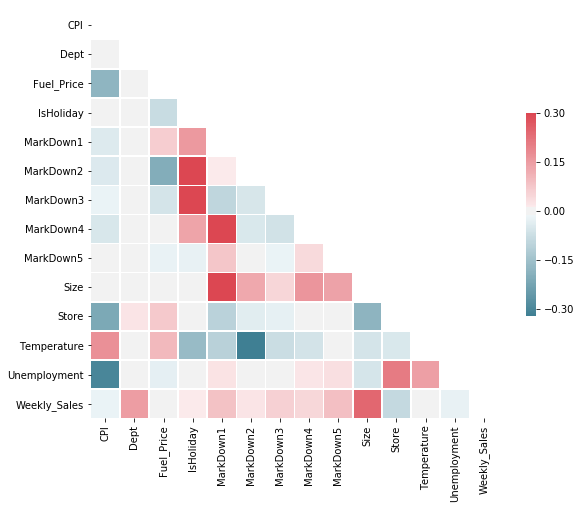

In [21]:
# Drowing correlation plot:-

plt.rcParams["figure.figsize"]=10,7.5

# Generate a mask for the upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Generate a custom diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [1]:
# Defining function for scatterplot:-

def scatterplots(feature, label):
    x = feature
    y = walmart_data['Weekly_Sales']
    plt.scatter(x, y)
    plt.ylabel('sales')
    plt.xlabel(label)
    plt.show()

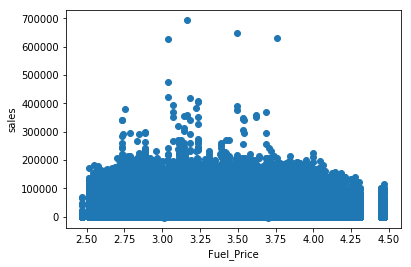

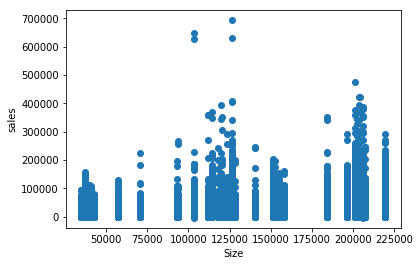

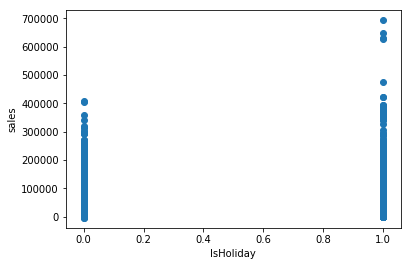

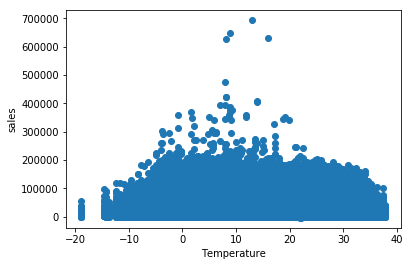

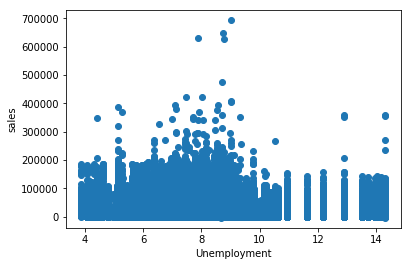

In [23]:
%matplotlib inline

headers = list(walmart_data)
labels = headers
scatterplots(walmart_data['Fuel_Price'], 'Fuel_Price')
scatterplots(walmart_data['Size'], 'Size')
scatterplots(walmart_data['IsHoliday'], 'IsHoliday')
scatterplots(walmart_data['Temperature'], 'Temperature')
scatterplots(walmart_data['Unemployment'], 'Unemployment')

we notice that type C stores have fewer sales in general and holidays clearly show more sales

### Getting more information about numerical var by creating function for data audit report

In [24]:
# Data Audit report:-

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [25]:
num_var_names=[key for key in dict(walmart_data.dtypes) if dict(walmart_data.dtypes)[key] in ["int32","int64","float32","float64"]]

In [26]:
num_var_names

['CPI',
 'Dept',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Size',
 'Store',
 'Temperature',
 'Unemployment',
 'Weekly_Sales']

In [27]:
num_var=walmart_data[num_var_names]

In [28]:
num_var.head()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
0,126.442065,1,2.962,NaN,NaN,NaN,NaN,NaN,126512,10,12.411111,9.765,40212.84
1,126.442065,98,2.962,NaN,NaN,NaN,NaN,NaN,126512,10,12.411111,9.765,74.00
2,126.442065,32,2.962,NaN,NaN,NaN,NaN,NaN,126512,10,12.411111,9.765,26116.73
3,126.442065,25,2.962,NaN,NaN,NaN,NaN,NaN,126512,10,12.411111,9.765,20779.50
4,126.442065,34,2.962,NaN,NaN,NaN,NaN,NaN,126512,10,12.411111,9.765,50585.42


In [29]:
num_var.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,498472.0,38162.0,8.578229e+07,172.090481,182.442420,39.542149,1.563582e+03,126.064000,126.114000,126.601903,129.089000,132.521867,182.442420,213.748126,221.441162,223.917015,227.443002,228.976456
Dept,536634.0,0.0,2.376070e+07,44.277301,37.000000,30.527358,9.319196e+02,1.000000,1.000000,4.000000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Fuel_Price,536634.0,0.0,1.829015e+06,3.408310,3.523000,0.430861,1.856414e-01,2.472000,2.572000,2.671000,2.759000,3.041000,3.523000,3.744000,3.906000,4.021000,4.193000,4.468000
MarkDown1,265596.0,271038.0,1.975504e+09,7438.004144,5126.540000,9411.341379,8.857335e+07,-2781.450000,18.200000,163.950000,403.310000,2114.640000,5126.540000,9303.850000,15308.070000,22494.620000,53311.880000,103184.980000
MarkDown2,197685.0,338949.0,6.937310e+08,3509.274827,385.310000,8992.047197,8.085691e+07,-265.760000,0.010000,3.000000,10.780000,72.500000,385.310000,2392.390000,8762.330000,18632.140000,47382.720000,104519.540000
MarkDown3,242326.0,294308.0,4.502208e+08,1857.913525,40.760000,11616.143274,1.349348e+08,-179.260000,0.100000,0.850000,2.000000,7.220000,40.760000,174.260000,573.920000,1330.530000,76740.950000,149483.310000
MarkDown4,237143.0,299491.0,7.995411e+08,3371.556866,1239.040000,6872.281734,4.722826e+07,0.220000,3.000000,22.430000,54.640000,336.240000,1239.040000,3397.080000,7805.380000,13110.540000,41847.940000,67474.850000
MarkDown5,266496.0,270138.0,1.152334e+09,4324.021158,2870.910000,13549.262124,1.835825e+08,-185.170000,317.190000,636.430000,888.900000,1570.112500,2870.910000,5012.220000,7888.040000,10421.010000,23525.360000,771448.100000
Size,536634.0,0.0,7.334636e+10,136678.550960,140167.000000,61007.711800,3.721941e+09,34875.000000,34875.000000,39690.000000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Store,536634.0,0.0,1.191790e+07,22.208621,22.000000,12.790580,1.635989e+02,1.000000,1.000000,3.000000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000




## Scrub the data and engineer features

### Missing values

We will start with filling in any blank values. There seem to be some missing values in the data. We have to make sure to deal with them before feeding anything into the network.

In [30]:
walmart_data= walmart_data.assign(md1_present = walmart_data.MarkDown1.notnull())
walmart_data= walmart_data.assign(md2_present = walmart_data.MarkDown2.notnull())
walmart_data = walmart_data.assign(md3_present = walmart_data.MarkDown3.notnull())
walmart_data = walmart_data.assign(md4_present = walmart_data.MarkDown4.notnull())
walmart_data= walmart_data.assign(md5_present = walmart_data.MarkDown5.notnull())

In [31]:
walmart_data.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Store,Temperature,Type,Unemployment,Weekly_Sales,md1_present,md2_present,md3_present,md4_present,md5_present
0,126.442065,2010-02-05,1,2.962,False,NaN,NaN,NaN,NaN,NaN,...,10,12.411111,B,9.765,40212.84,False,False,False,False,False
1,126.442065,2010-02-05,98,2.962,False,NaN,NaN,NaN,NaN,NaN,...,10,12.411111,B,9.765,74.00,False,False,False,False,False
2,126.442065,2010-02-05,32,2.962,False,NaN,NaN,NaN,NaN,NaN,...,10,12.411111,B,9.765,26116.73,False,False,False,False,False
3,126.442065,2010-02-05,25,2.962,False,NaN,NaN,NaN,NaN,NaN,...,10,12.411111,B,9.765,20779.50,False,False,False,False,False
4,126.442065,2010-02-05,34,2.962,False,NaN,NaN,NaN,NaN,NaN,...,10,12.411111,B,9.765,50585.42,False,False,False,False,False


In [32]:
walmart_data.fillna(0,inplace=True)

### Creating Dummy Variable:-

In [33]:
# Make sure we can later recognize what a dummy once belonged to
walmart_data['Type'] = 'Type_' + walmart_data['Type'].map(str)
walmart_data['IsHoliday'] = 'IsHoliday_' + walmart_data['IsHoliday'].map(str)

In [34]:
type_dummies = pd.get_dummies(walmart_data['Type'])
holiday_dummies = pd.get_dummies(walmart_data['IsHoliday'])

In [35]:
type_dummies.head()

,Type_A,Type_B,Type_C
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [36]:
holiday_dummies.head()

,IsHoliday_False,IsHoliday_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


### Dummy variables:- Dates

In [37]:
walmart_data['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in walmart_data['Date'].astype(str).values.tolist()]

In [38]:
walmart_data['Month'] = [date.month for date in walmart_data['Date']]
walmart_data['Month'] = 'Month_' + walmart_data['Month'].map(str)
Month_dummies = pd.get_dummies(walmart_data['Month'] )

In [39]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 115063
Data columns (total 23 columns):
CPI             536634 non-null float64
Date            536634 non-null object
Dept            536634 non-null int64
Fuel_Price      536634 non-null float64
IsHoliday       536634 non-null object
MarkDown1       536634 non-null float64
MarkDown2       536634 non-null float64
MarkDown3       536634 non-null float64
MarkDown4       536634 non-null float64
MarkDown5       536634 non-null float64
Size            536634 non-null int64
Split           536634 non-null object
Store           536634 non-null int64
Temperature     536634 non-null float64
Type            536634 non-null object
Unemployment    536634 non-null float64
Weekly_Sales    536634 non-null float64
md1_present     536634 non-null bool
md2_present     536634 non-null bool
md3_present     536634 non-null bool
md4_present     536634 non-null bool
md5_present     536634 non-null bool
Month           536634 non-null ob

#### Next, let's look at 'special dates'. One variable for Christmas, one for black friday. We have to manually look up the dates of black friday if we want to extrapolate our data to other years, but for now we know: 26 - 11 - 2010 and 25 - 11 - 2011.

In [40]:
walmart_data['Black_Friday'] = np.where((walmart_data['Date']==datetime(2010, 11, 26).date()) | (walmart_data['Date']==datetime(2011, 11, 25).date()), 'yes', 'no')
walmart_data['Pre_christmas'] = np.where((walmart_data['Date']==datetime(2010, 12, 23).date()) | (walmart_data['Date']==datetime(2010, 12, 24).date()) | (walmart_data['Date']==datetime(2011, 12, 23).date()) | (walmart_data['Date']==datetime(2011, 12, 24).date()), 'yes', 'no')
walmart_data['Black_Friday'] = 'Black_Friday_' + walmart_data['Black_Friday'].map(str)
walmart_data['Pre_christmas'] = 'Pre_christmas_' + walmart_data['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(walmart_data['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(walmart_data['Pre_christmas'] )

In [41]:
Pre_christmas_dummies.head()

,Pre_christmas_no,Pre_christmas_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
Black_Friday_dummies.head()

,Black_Friday_no,Black_Friday_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [43]:
df=pd.concat([walmart_data,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)

In [44]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,md5_present,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,126.442065,2010-02-05,1,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,False,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
1,126.442065,2010-02-05,98,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,False,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
2,126.442065,2010-02-05,32,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,False,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
3,126.442065,2010-02-05,25,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,False,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
4,126.442065,2010-02-05,34,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,False,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0


> ### Store median

We will take the store median in the available data as one of its properties

In [45]:
# Get dataframe with averages per store and department
medians = pd.DataFrame({'Median Sales' :df.loc[df['Split']=='Train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians.head()

,Type,Dept,Store,Month,IsHoliday,Median Sales
0,Type_A,1,1,Month_1,IsHoliday_False,17350.585
1,Type_A,1,1,Month_10,IsHoliday_False,23388.030
2,Type_A,1,1,Month_11,IsHoliday_False,19551.115
3,Type_A,1,1,Month_11,IsHoliday_True,19865.770
4,Type_A,1,1,Month_12,IsHoliday_False,39109.390


In [46]:
# Merge by type, store, department and month
df = df.merge(medians, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])


In [47]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales
0,126.442065,2010-02-05,1,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0
1,126.526286,2010-02-19,1,2.915,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0
2,126.552286,2010-02-26,1,2.825,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0
3,127.719581,2011-02-04,1,3.348,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0
4,127.995250,2011-02-18,1,3.430,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0


In [48]:
# Fill NA
df['Median Sales'].fillna(df['Median Sales'].loc[df['Split']=='Train'].median(), inplace=True) 

# Create a key for easy access

df['Key'] = df['Type'].map(str)+df['Dept'].map(str)+df['Store'].map(str)+df['Date'].map(str)+df['IsHoliday'].map(str)


In [49]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key
0,126.442065,2010-02-05,1,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102010-02-05IsHoliday_False
1,126.526286,2010-02-19,1,2.915,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102010-02-19IsHoliday_False
2,126.552286,2010-02-26,1,2.825,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102010-02-26IsHoliday_False
3,127.719581,2011-02-04,1,3.348,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102011-02-04IsHoliday_False
4,127.995250,2011-02-18,1,3.430,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102011-02-18IsHoliday_False


### Lagged Variables:-

In [50]:
# Attach variable of last weeks time
df['DateLagged'] = df['Date']- timedelta(days=7)
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged
0,126.442065,2010-02-05,1,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102010-02-05IsHoliday_False,2010-01-29
1,126.526286,2010-02-19,1,2.915,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102010-02-19IsHoliday_False,2010-02-12
2,126.552286,2010-02-26,1,2.825,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102010-02-26IsHoliday_False,2010-02-19
3,127.719581,2011-02-04,1,3.348,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102011-02-04IsHoliday_False,2011-01-28
4,127.995250,2011-02-18,1,3.430,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,1,0,1,0,1,0,36444.0,Type_B1102011-02-18IsHoliday_False,2011-02-11


In [51]:
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_df = df.sort_values(['Store', 'Dept','Date'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

#### Loop over its rows and check at each step if the previous week's sales are available. If not, fill with store and department average, which we retrieved before.

###  Lagged Variables

We will take a lagged variable of our store's previous weeks sales. To do so, we will first add a column with a one week lagged date, sort the data, and then match the lagged sales with the initial dataframe using the department and store number.

We begin by adding a column with a one week lag.

In [52]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['Date']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [53]:
sorted_df[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,Date,LaggedSales,Weekly_Sales,Median Sales
0,1,1,2010-02-05,23510.49,24924.50,23510.49
1,1,1,2010-02-12,24924.50,46039.49,37887.17
2,1,1,2010-02-19,46039.49,41595.55,23510.49
3,1,1,2010-02-26,41595.55,19403.54,23510.49
4,1,1,2010-03-05,19403.54,21827.90,21280.40


In [54]:
# Merge by store and department
df = df.merge(sorted_df[['Dept', 'Store','Date','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','Date'])

In [55]:
df['Sales_dif'] = df['Median Sales'] - df['LaggedSales']
df[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,Date,LaggedSales,Weekly_Sales,Median Sales
0,1,10,2010-02-05,36444.00,40212.84,36444.0
1,1,10,2010-02-19,67699.32,49748.33,36444.0
2,1,10,2010-02-26,49748.33,33601.22,36444.0
3,1,10,2011-02-04,29890.73,36145.83,36444.0
4,1,10,2011-02-18,52118.42,64020.62,36444.0


### Remove redundant items

We will take the store average in the available data as one of its properties

In [56]:
switch= 1

if(switch):
    df_backup = df
else:
    df=df_backup
    display(df_backup.head())

In [57]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif
0,126.442065,2010-02-05,1,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,36444.0,Type_B1102010-02-05IsHoliday_False,2010-01-29,36444.00,0.0,0.00
1,126.526286,2010-02-19,1,2.915,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,36444.0,Type_B1102010-02-19IsHoliday_False,2010-02-12,67699.32,1.0,-31255.32
2,126.552286,2010-02-26,1,2.825,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,36444.0,Type_B1102010-02-26IsHoliday_False,2010-02-19,49748.33,1.0,-13304.33
3,127.719581,2011-02-04,1,3.348,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,36444.0,Type_B1102011-02-04IsHoliday_False,2011-01-28,29890.73,1.0,6553.27
4,127.995250,2011-02-18,1,3.430,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,36444.0,Type_B1102011-02-18IsHoliday_False,2011-02-11,52118.42,1.0,-15674.42


In [58]:
df['Difference'] = df['Median Sales'] - df['Weekly_Sales']

In [59]:
df.head(4)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,126.442065,2010-02-05,1,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102010-02-05IsHoliday_False,2010-01-29,36444.00,0.0,0.00,-3768.84
1,126.526286,2010-02-19,1,2.915,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102010-02-19IsHoliday_False,2010-02-12,67699.32,1.0,-31255.32,-13304.33
2,126.552286,2010-02-26,1,2.825,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102010-02-26IsHoliday_False,2010-02-19,49748.33,1.0,-13304.33,2842.78
3,127.719581,2011-02-04,1,3.348,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102011-02-04IsHoliday_False,2011-01-28,29890.73,1.0,6553.27,298.17


In [60]:
corr=df.corr()

In [80]:
#corr.to_csv("corr.csv")

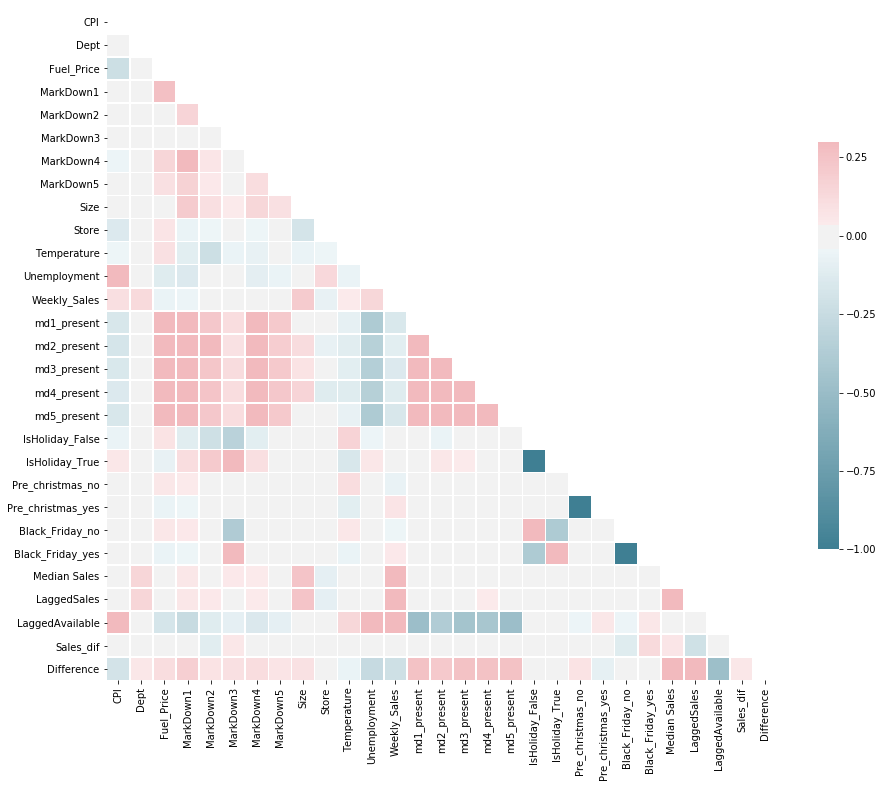

In [61]:
plt.rcParams["figure.figsize"]=15,15

# Generate a mask for the upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Generate a custom diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## variable selection:-

In [62]:
features = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'md1_present',
    'md2_present',
    'md3_present',
    'md4_present',
    'md5_present',

    'Unemployment',
    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'LaggedSales',
    'Sales_dif',
    'LaggedAvailable'
    ]

In [63]:
df[features].describe()


,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
count,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.00000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000,536634.000000
mean,159.852499,3.408310,3681.287709,1292.745138,838.971725,1489.918846,2147.337557,136678.55096,14.873201,7.237779,0.928091,0.071909,0.988851,0.011149,0.988896,0.011104,15969.738804,-195.362035,0.773412
std,58.383773,0.430861,7593.883000,5714.136207,7860.456173,4865.593575,9789.902903,61007.71180,10.377064,2.691035,0.258338,0.258338,0.104999,0.104999,0.104791,0.104791,22689.394444,6003.550792,0.418624
min,0.000000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,34875.00000,-21.827778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1750.000000,-540263.085000,0.000000
25%,131.126667,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,93638.00000,7.361111,6.334000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2102.872500,-302.140000,1.000000
50%,140.439786,3.523000,0.000000,0.000000,0.000000,0.000000,0.000000,140167.00000,15.588889,7.567000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,7608.320000,0.000000,1.000000
75%,212.303441,3.744000,5046.740000,118.730000,29.140000,906.450000,2852.190000,202505.00000,22.905556,8.512000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20182.661250,279.820000,1.000000
max,228.976456,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,219622.00000,38.861111,14.313000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,693099.360000,579251.325000,1.000000


In [64]:
df[features].head()

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,md1_present,...,Unemployment,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
0,126.442065,2.962,0.0,0.0,0.0,0.0,0.0,126512,12.411111,False,...,9.765,1,0,1,0,1,0,36444.00,0.00,0.0
1,126.526286,2.915,0.0,0.0,0.0,0.0,0.0,126512,14.566667,False,...,9.765,1,0,1,0,1,0,67699.32,-31255.32,1.0
2,126.552286,2.825,0.0,0.0,0.0,0.0,0.0,126512,11.538889,False,...,9.765,1,0,1,0,1,0,49748.33,-13304.33,1.0
3,127.719581,3.348,0.0,0.0,0.0,0.0,0.0,126512,7.155556,False,...,8.744,1,0,1,0,1,0,29890.73,6553.27,1.0
4,127.995250,3.430,0.0,0.0,0.0,0.0,0.0,126512,16.538889,False,...,8.744,1,0,1,0,1,0,52118.42,-15674.42,1.0


### Spliting dataset:-

In [65]:
train = df.loc[df['Split']=='Train']
test = df.loc[df['Split']=='Test']
test.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
9,132.153710,2013-02-01,1,3.600,IsHoliday_False,12823.37,683.96,388.4,7973.65,1063.21,...,0,1,0,36444.0,Type_B1102013-02-01IsHoliday_False,2013-01-25,36444.0,0.0,0.0,36444.0
10,132.272571,2013-02-15,1,3.612,IsHoliday_False,15135.48,4327.15,35.2,3501.52,7136.52,...,0,1,0,36444.0,Type_B1102013-02-15IsHoliday_False,2013-02-08,36444.0,0.0,0.0,36444.0
11,132.320071,2013-02-22,1,4.031,IsHoliday_False,9000.19,4205.69,200.4,1181.68,3176.17,...,0,1,0,36444.0,Type_B1102013-02-22IsHoliday_False,2013-02-15,36444.0,0.0,0.0,36444.0
19,132.153710,2013-02-01,98,3.600,IsHoliday_False,12823.37,683.96,388.4,7973.65,1063.21,...,0,1,0,24.5,Type_B98102013-02-01IsHoliday_False,2013-01-25,24.5,0.0,0.0,24.5
20,132.272571,2013-02-15,98,3.612,IsHoliday_False,15135.48,4327.15,35.2,3501.52,7136.52,...,0,1,0,24.5,Type_B98102013-02-15IsHoliday_False,2013-02-08,24.5,0.0,0.0,24.5


In [66]:
train.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,126.442065,2010-02-05,1,2.962,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102010-02-05IsHoliday_False,2010-01-29,36444.00,0.0,0.00,-3768.84
1,126.526286,2010-02-19,1,2.915,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102010-02-19IsHoliday_False,2010-02-12,67699.32,1.0,-31255.32,-13304.33
2,126.552286,2010-02-26,1,2.825,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102010-02-26IsHoliday_False,2010-02-19,49748.33,1.0,-13304.33,2842.78
3,127.719581,2011-02-04,1,3.348,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102011-02-04IsHoliday_False,2011-01-28,29890.73,1.0,6553.27,298.17
4,127.995250,2011-02-18,1,3.430,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,36444.0,Type_B1102011-02-18IsHoliday_False,2011-02-11,52118.42,1.0,-15674.42,-27576.62


In [67]:
print(train.shape)
print(test.shape)

(421570, 38)
(115064, 38)


In [68]:
train_x,test_x,train_y,test_y=train_test_split(train[features],train["Difference"],test_size=0.2,random_state=42)

## Applying random forest model:-

In [69]:
rf_model= RandomForestRegressor(n_estimators=100)

In [70]:
rf_train=rf_model.fit(train_x,train_y)

In [71]:
rf_pred_train=pd.DataFrame(rf_train.predict(train_x))

In [72]:
rf_pred_train.head()

,0
0,575.77180
1,-1480.67795
2,-365.25495
3,269.52545
4,5546.92730


In [73]:
metrics.mean_absolute_error(train_y,rf_pred_train[0])

487.41397201080196

In [74]:
rf_test=rf_model.fit(test_x,test_y)

In [75]:
rf_pred_test=pd.DataFrame(rf_model.predict(test_x))

In [76]:
rf_pred_test.head()

,0
0,502.05490
1,-1244.87825
2,-14.83635
3,-17159.63370
4,286.24830


In [77]:
metrics.mean_absolute_error(test_y,rf_pred_test[0])

509.2566538309178

## Forecasting Sales:-

In [82]:
final_y_prediction = rf_model.predict(test[features])

In [87]:
testfile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis=1)
testfile['prediction'] = testfile['Median Sales']-testfile[0]


In [88]:
testfile.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,0,prediction
0,132.153710,2013-02-01,1,3.600,IsHoliday_False,12823.37,683.96,388.4,7973.65,1063.21,...,0,36444.0,Type_B1102013-02-01IsHoliday_False,2013-01-25,36444.0,0.0,0.0,36444.0,-1350.54935,37794.54935
1,132.272571,2013-02-15,1,3.612,IsHoliday_False,15135.48,4327.15,35.2,3501.52,7136.52,...,0,36444.0,Type_B1102013-02-15IsHoliday_False,2013-02-08,36444.0,0.0,0.0,36444.0,-1187.34535,37631.34535
2,132.320071,2013-02-22,1,4.031,IsHoliday_False,9000.19,4205.69,200.4,1181.68,3176.17,...,0,36444.0,Type_B1102013-02-22IsHoliday_False,2013-02-15,36444.0,0.0,0.0,36444.0,-1407.71410,37851.71410
3,132.153710,2013-02-01,98,3.600,IsHoliday_False,12823.37,683.96,388.4,7973.65,1063.21,...,0,24.5,Type_B98102013-02-01IsHoliday_False,2013-01-25,24.5,0.0,0.0,24.5,11.59365,12.90635
4,132.272571,2013-02-15,98,3.612,IsHoliday_False,15135.48,4327.15,35.2,3501.52,7136.52,...,0,24.5,Type_B98102013-02-15IsHoliday_False,2013-02-08,24.5,0.0,0.0,24.5,16.41150,8.08850


In [89]:
#testfile.to_csv("final_result.csv")